# Imports

In [4]:
import rasa_nlu
import rasa_core
import spacy

print("rasa_nlu: {} rasa_core: {}".format(rasa_nlu.__version__, rasa_core.__version__))
print("Loading spaCy language model...")
print(spacy.load("en")("Hello world!"))

rasa_nlu: 0.13.7 rasa_core: 0.10.0a2
Loading spaCy language model...
Hello world!


In [ ]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

# Generate NLU Validation Data

In [6]:
import pandas as pd
import os
path_folder='.'
logs=pd.read_csv("doremus_log_2018-06.csv")
intents=logs["intent"].unique().tolist()
intent_val_data=[]
for intent in intents:
    messages=logs.groupby("intent").get_group(intent)['cleanMessage'].unique().tolist()
    messages=list(map(lambda word: word.replace('"', ''),messages))
    intent_string="## intent: {}".format(intent)
    intent_string="\n - ".join([intent_string]+messages)
    intent_val_data.append(intent_string)
file_name="nlu_validation"
with open(os.path.join(path_folder, '{}.md'.format(file_name)), mode='w') as md_file:
    md_file.write("\n".join(intent_val_data))    

# Evaluate NLU model

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu_validation.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 257 (13 distinct intents)
	- Found intents: 'help', 'works-by', 'hello', 'works-by-artist', 'works-by - no', 'find-performance', 'find-artist', 'works-by-genre', 'works-by-years', 'works-by-instrument', 'discover-artist', 'reset', 'works-by - yes'
	- entity examples: 180 (7 distinct entities)
	- found entities: 'doremus-artist', 'doremus-genre', 'geo-city', 'number', 'doremus-instrument', 'doremus-strictly', 'date-period'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 257 examples that have a defined intent out of 257 examples
INFO:rasa_nlu.evaluate:F1-Score:  0.8862940239642934
INFO:rasa_nlu.evaluate:Precision: 0.9019658970410064
INFO:rasa_nlu.evaluate:Accuracy:  0.88715

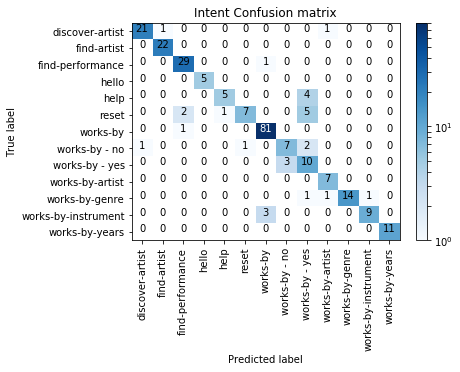

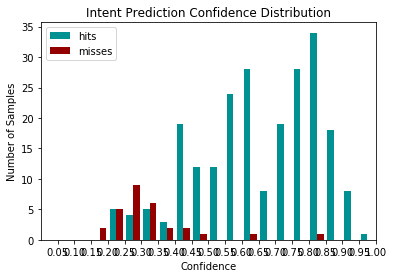

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  0.9112997167649098
INFO:rasa_nlu.evaluate:Precision: 0.9200822285858649
INFO:rasa_nlu.evaluate:Accuracy:  0.9158553546592489
INFO:rasa_nlu.evaluate:Classification report: 
                    precision    recall  f1-score   support

       date-period       0.95      0.81      0.88       157
    doremus-artist       0.97      0.72      0.83       103
     doremus-genre       0.95      0.45      0.61        40
doremus-instrument       1.00      0.89      0.94        27
  doremus-strictly       1.00      1.00      1.00         4
          geo-city       1.00      0.76      0.86        33
         no_entity       0.90      0.99      0.94       981
            number       0.95      0.82      0.88        93

       avg / total       0.92      0.92      0.91      1438



In [12]:
%matplotlib inline
from rasa_nlu.evaluate import run_evaluation


import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')
model_directory='C:/Users/Alaa Boukhary/Desktop/RASA_project/DOREMOS/models/nlu/default/current'

run_evaluation("nlu_validation.md", model_directory)

## Generate Validation data for Rasa Core Model

In [25]:
import pandas as pd
import os
path_folder='.'
logs=pd.read_csv("doremus_log_2018-06.csv")
intents_with_result_card=np.unique(logs[logs["response"]=='<result_card>']['intent']).tolist()
intents_to_actions={"Default Fallback Intent": "input_unknown", "Default Welcome Intent": "input_welcome",
                    "discover-artist": "discover_artist", "find-artist": "find_artist", "find-performance": "find_performance",
                   "hello": "input_welcome", "help": "help", "reset": "reset", "works-by - no": "works_by_works_by_no",
                   "works-by - yes": "works_by_works_by_yes", "works-by-artist": "works_by_artist",
                    "works-by-genre": "works_by_genre", "works-by-instrument": "works_by_instrument", 
                    "works-by-years": "works_by_years", "works-by": "works_by"
                   }
works_by_intents=["works-by-genre", "works-by-instrument", "works-by-artist", "works-by-years"]


users=logs["user"].unique().tolist()
i=0
stories_list=[]
for user in users:
    story_string=["## story{}".format(i)]
    story=logs.groupby("user").get_group(user)[["intent","response"]]
    for index, row in story.iterrows():
        intent=row['intent']
        if intent=="works-by-something":
            intent= np.random.choice(works_by_intents)
        
        response=row['response']
        if response=='<result_card>':
            story_string.append('\n * {}\n  - {}'.format(intent,intents_to_actions[intent]))
        else:
            if intent not in intents_with_result_card:
                story_string.append('\n * {}\n  - {}'.format(intent,intents_to_actions[intent]))
                
    stories_list.append("".join(story_string))   
    i+=1
file_name="stories_evaluation"
with open(os.path.join(path_folder, '{}.md'.format(file_name)), mode='w') as md_file:
    md_file.write("\n".join(stories_list))    

# Run Evaluation of RASA Core

INFO:apscheduler.scheduler:Scheduler started
Using TensorFlow backend.
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
Processed Story Blocks: 100%|██████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]
INFO:rasa_core.evaluate:Evaluating 17 stories
Progress:
  6%|████▉                    

INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-

INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-

INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en

INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en

INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processin

INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:co

INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-artist and text: works-by-instrument
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.pro

INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-artist and text: find-artist
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Proc

INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-artist and text: works-by - no
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing f

INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-artist and text: works-by - no
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: wor

INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-artist and text: works-by-years
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing

INFO:common:Slot: doremus-artist and text: works-by-genre
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO

INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-g

INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processin

INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entrie

INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:co

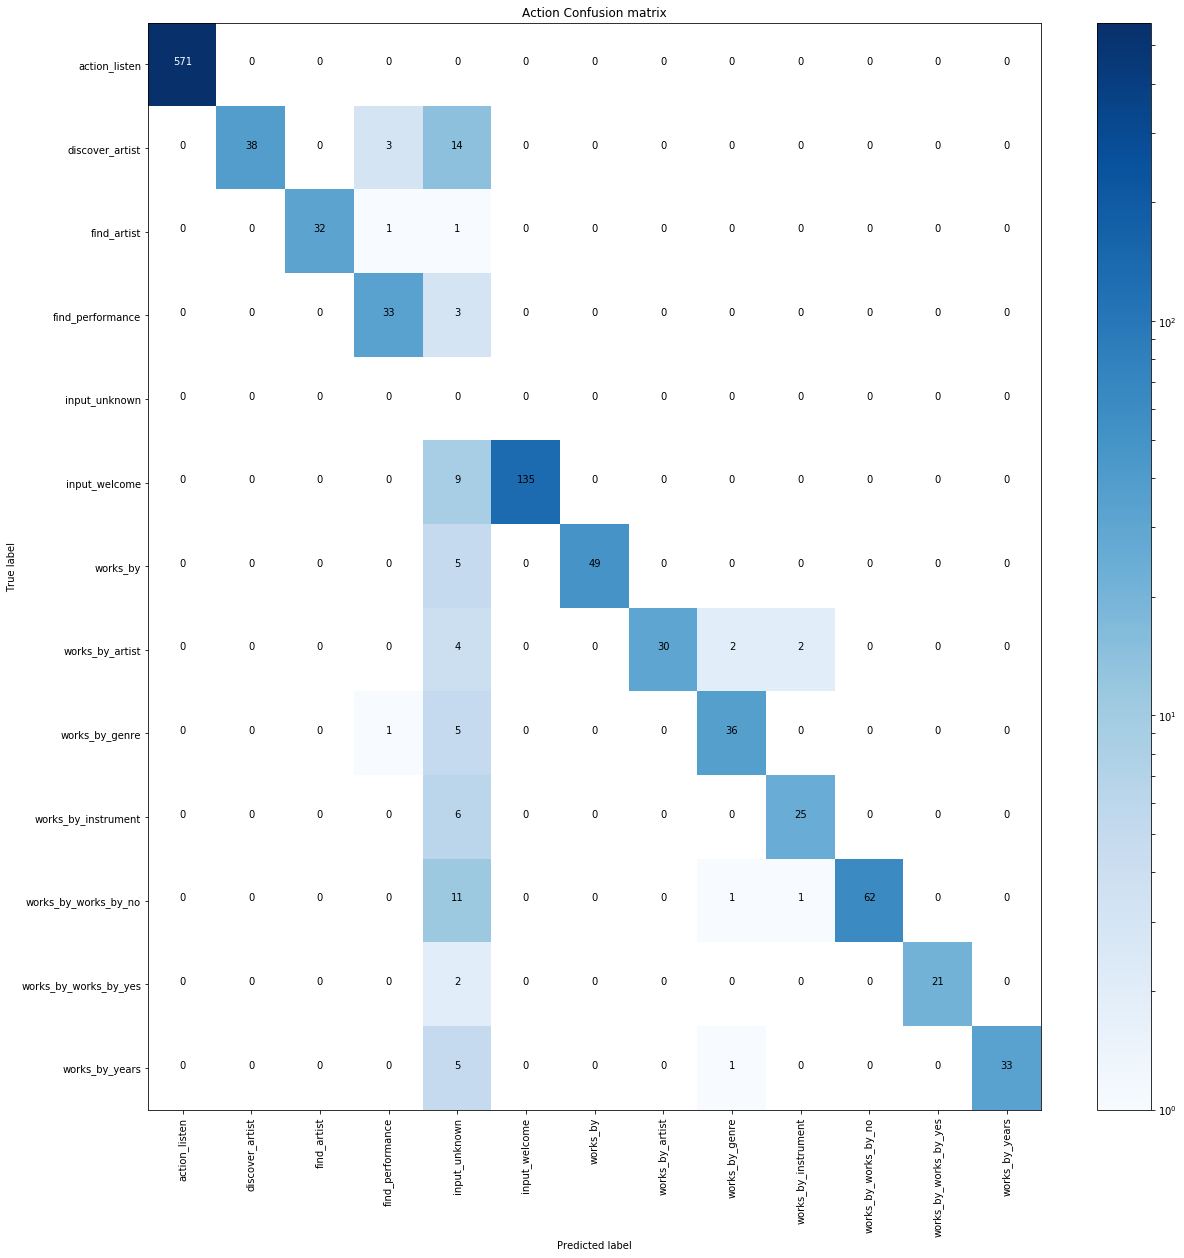

In [13]:
from rasa_core.evaluate import run_story_evaluation
import logging
import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')


run_story_evaluation("stories_evaluation.md", "C:/Users/Alaa Boukhary/Desktop/RASA_project/DOREMOS/models/dialogue", 
                     nlu_model_path=None, 
                     max_stories=None, 
                     out_file_plot="story_evaluation.pdf")

In [1]:
from rasa_core.agent import Agent
agent = Agent.load('./models/dialogue', interpreter='C:/Users/Alaa Boukhary/Desktop/RASA_project/DOREMOS/models/nlu/default/current')
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])

C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\pykwalify\core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
DEBUG:root:test


Your bot is ready to talk! Type your messages here or send 'stop'
hi


DEBUG:rasa_core.tracker_store:Creating a new tracker for id 'default'.
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'hi' with intent '{'name': 'hello', 'confidence': 0.6198383628342694}' and entities '[]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 2 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: None
	discover-artist: None
	doremus-artist: None
	doremus-genre: None
	doremus-instrument: None
	doremus-strictly: None
	geo-city: None
	number: None
	requested_slot: None
	works-by-followup: None
DEBUG:rasa_core.policies.memoization:Current tracker state [None, None, None, {}, {'prev_action_listen': 1.0, 'intent_hello': 1.0}]
DEBUG:rasa_core.policies.memoiz

Hi! Everyday I try to learn as much as possible about music. Try me if you dont believe it!
help


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'help' with intent '{'name': 'help', 'confidence': 0.6125564308887165}' and entities '[]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 7 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: None
	discover-artist: None
	doremus-artist: None
	doremus-genre: None
	doremus-instrument: None
	doremus-strictly: None
	geo-city: None
	number: None
	requested_slot: None
	works-by-followup: None
DEBUG:rasa_core.policies.memoization:Current tracker state [None, {}, {'prev_action_listen': 1.0, 'intent_hello': 1.0}, {'prev_input_welcome': 1.0, 'intent_hello': 1.0

I can do a lot of things... For example, ask me "Give me 2 works by Mozart!", or... "Tell me something about Vivaldi", or... "Are there any events next week?". Start now if you want! Find more example here: https://github.com/D2KLab/music-chatbot/blob/master/README.md#bot-features
tell me something


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'tell me something' with intent '{'name': 'discover-artist', 'confidence': 0.2565792574544644}' and entities '[]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 12 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: None
	discover-artist: None
	doremus-artist: None
	doremus-genre: None
	doremus-instrument: None
	doremus-strictly: None
	geo-city: None
	number: None
	requested_slot: None
	works-by-followup: None
DEBUG:rasa_core.policies.memoization:Current tracker state [{'prev_action_listen': 1.0, 'intent_hello': 1.0}, {'prev_input_welcome': 1.0, 'int

I missed that.
tell me about mozart


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'tell me about mozart' with intent '{'name': 'discover-artist', 'confidence': 0.8407247072701896}' and entities '[{'start': 14, 'end': 20, 'value': '2f7fc858-1fc0-3f39-8d06-684f4912ce01', 'entity': 'doremus-artist', 'confidence': 0.9645183763305044, 'extractor': 'ner_crf', 'processors': ['ner_synonyms']}]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 18 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: None
	discover-artist: None
	doremus-artist: 2f7fc858-1fc0-3f39-8d06-684f4912ce01
	doremus-genre: None
	doremus-instrument: None
	doremus-strictly

Discovering Artist...
tell me


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'tell me' with intent '{'name': 'discover-artist', 'confidence': 0.3422455817934047}' and entities '[]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 23 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: None
	discover-artist: None
	doremus-artist: 2f7fc858-1fc0-3f39-8d06-684f4912ce01
	doremus-genre: None
	doremus-instrument: None
	doremus-strictly: None
	geo-city: None
	number: None
	requested_slot: None
	works-by-followup: None
DEBUG:rasa_core.policies.memoization:Current tracker state [{'prev_action_listen': 1.0, 'intent_discover-artist': 1.0}, 

Discovering Artist...
give me


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'give me' with intent '{'name': 'discover-artist', 'confidence': 0.24202008789619975}' and entities '[]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 28 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: None
	discover-artist: None
	doremus-artist: 2f7fc858-1fc0-3f39-8d06-684f4912ce01
	doremus-genre: None
	doremus-instrument: None
	doremus-strictly: None
	geo-city: None
	number: None
	requested_slot: None
	works-by-followup: None
DEBUG:rasa_core.policies.memoization:Current tracker state [{'entity_doremus-artist': 1.0, 'prev_action_listen': 1.0, '

Sorry, could you say that again?
give me 2 artists


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'give me 2 artists' with intent '{'name': 'works-by', 'confidence': 0.455089812978784}' and entities '[{'start': 8, 'end': 9, 'value': '2', 'entity': 'number', 'confidence': 0.9839795460017856, 'extractor': 'ner_crf'}]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 34 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: None
	discover-artist: None
	doremus-artist: 2f7fc858-1fc0-3f39-8d06-684f4912ce01
	doremus-genre: None
	doremus-instrument: None
	doremus-strictly: None
	geo-city: None
	number: 2
	requested_slot: None
	works-by-followup: None
DEBUG:r

Sure! Do you want to add some filters? Like the artist, instruments, genre or composition period.
composition period


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'composition period' with intent '{'name': 'works-by-years', 'confidence': 0.9505780632747822}' and entities '[]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 39 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: None
	discover-artist: None
	doremus-artist: 2f7fc858-1fc0-3f39-8d06-684f4912ce01
	doremus-genre: None
	doremus-instrument: None
	doremus-strictly: None
	geo-city: None
	number: 2
	requested_slot: None
	works-by-followup: None
DEBUG:rasa_core.policies.memoization:Current tracker state [{'prev_action_listen': 1.0, 'slot_doremus-artist_0': 

Ok! Whats the composition period?
between 1990 and 1920


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: do

Perfect! Do you want to add something?
no


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'no' with intent '{'name': 'works-by - no', 'confidence': 0.7476735443263656}' and entities '[]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 51 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: between 1990 and 1920
	discover-artist: None
	doremus-artist: 2f7fc858-1fc0-3f39-8d06-684f4912ce01
	doremus-genre: None
	doremus-instrument: None
	doremus-strictly: None
	geo-city: None
	number: 2
	requested_slot: None
	works-by-followup: None
DEBUG:rasa_core.policies.memoization:Current tracker state [{'intent_works-by-years': 1.0, 'prev_action_listen': 

ok!
tell me about 2 artists


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'tell me about 2 artists' with intent '{'name': 'works-by', 'confidence': 0.3516391979780713}' and entities '[{'start': 14, 'end': 15, 'value': '2', 'entity': 'number', 'confidence': 0.9343704127598937, 'extractor': 'ner_crf'}]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 57 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: between 1990 and 1920
	discover-artist: None
	doremus-artist: 2f7fc858-1fc0-3f39-8d06-684f4912ce01
	doremus-genre: None
	doremus-instrument: None
	doremus-strictly: None
	geo-city: None
	number: 2
	requested_slot: None
	works

No problem! Do you want to add some filters? Like the artist, instruments, genre or composition period.
instruments


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'instruments' with intent '{'name': 'works-by-instrument', 'confidence': 0.8422331614284014}' and entities '[]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 62 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: between 1990 and 1920
	discover-artist: None
	doremus-artist: 2f7fc858-1fc0-3f39-8d06-684f4912ce01
	doremus-genre: None
	doremus-instrument: None
	doremus-strictly: None
	geo-city: None
	number: 2
	requested_slot: None
	works-by-followup: None
DEBUG:rasa_core.policies.memoization:Current tracker state [{'intent_works-by - no': 1.0, 'prev_ac

Ok! Just tell me the instrument
piano


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: do

Perfect! Do you want to add something?
yes


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'yes' with intent '{'name': 'works-by - yes', 'confidence': 0.5653586096982499}' and entities '[]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 74 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: between 1990 and 1920
	discover-artist: None
	doremus-artist: 2f7fc858-1fc0-3f39-8d06-684f4912ce01
	doremus-genre: None
	doremus-instrument: piano
	doremus-strictly: None
	geo-city: None
	number: 2
	requested_slot: None
	works-by-followup: None
DEBUG:rasa_core.policies.memoization:Current tracker state [{'intent_works-by-instrument': 1.0, 'prev_action_l

Ok, tell me what
genre


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'genre' with intent '{'name': 'works-by-genre', 'confidence': 0.9926950503939348}' and entities '[]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 79 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: between 1990 and 1920
	discover-artist: None
	doremus-artist: 2f7fc858-1fc0-3f39-8d06-684f4912ce01
	doremus-genre: None
	doremus-instrument: piano
	doremus-strictly: None
	geo-city: None
	number: 2
	requested_slot: None
	works-by-followup: None
DEBUG:rasa_core.policies.memoization:Current tracker state [{'entity_doremus-instrument': 1.0, 'intent_works

Ok! Just tell me the genre, please
melodie


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: do

Perfect! Do you want to add something?
no


DEBUG:rasa_core.tracker_store:Recreating tracker for id 'default'
C:\Users\Alaa Boukhary\Anaconda3\envs\tf15\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
DEBUG:rasa_core.processor:Received user message 'no' with intent '{'name': 'works-by - no', 'confidence': 0.7476735443263656}' and entities '[]'
DEBUG:rasa_core.processor:Logged UserUtterance - tracker now has 91 events
DEBUG:rasa_core.processor:Current slot values: 
	date-period: between 1990 and 1920
	discover-artist: None
	doremus-artist: 2f7fc858-1fc0-3f39-8d06-684f4912ce01
	doremus-genre: melodie
	doremus-instrument: piano
	doremus-strictly: None
	geo-city: None
	number: 2
	requested_slot: None
	works-by-followup: None
DEBUG:rasa_core.policies.memoization:Current tracker state [{'prev_action_listen': 1.0, 'slot_date-period_0':

ok!
stop


# Adding Training Data

## Improving NLU Accuracy

In [4]:
import pandas as pd
import os
path_folder='.'
logs=pd.read_csv("doremus_log_2018-07.csv")
intents_to_improve=['works-by']
intent_val_data=[]
for intent in intents_to_improve:
    messages=logs.groupby("intent").get_group(intent)['cleanMessage'].unique().tolist()
    messages=list(map(lambda word: word.replace('"', ''),messages))
    intent_string="## intent: {}".format(intent)
    intent_string="\n - ".join([intent_string]+messages)
    intent_val_data.append(intent_string)
file_name="intents_to_imporve"
with open(os.path.join(path_folder, '{}.md'.format(file_name)), mode='w') as md_file:
    md_file.write("\n".join(intent_val_data)) 


## Improving RASA CORE Accuracy

In [20]:
import pandas as pd
import os
import numpy as np
path_folder='.'
logs=pd.read_csv("doremus_log_2018-11.csv")
intents_with_result_card=np.unique(logs[logs["response"]=='<result_card>']['intent']).tolist()
intents_to_actions={"Default Fallback Intent": "input_unknown", "Default Welcome Intent": "input_welcome",
                    "discover-artist": "discover_artist", "find-artist": "find_artist", "find-performance": "find_performance",
                   "hello": "input_welcome", "help": "help", "reset": "reset", "works-by - no": "works_by_works_by_no",
                   "works-by - yes": "works_by_works_by_yes", "works-by-artist": "works_by_artist",
                    "works-by-genre": "works_by_genre", "works-by-instrument": "works_by_instrument", 
                    "works-by-years": "works_by_years", "works-by": "works_by"
                   }
works_by_intents=["works-by-genre", "works-by-instrument", "works-by-artist", "works-by-years"]


users=logs["user"].unique().tolist()
i=0
stories_list=[]
for user in users:
    story_string=["## story{}".format(i)]
    story=logs.groupby("user").get_group(user)[["intent","response"]]
    for index, row in story.iterrows():
        intent=row['intent']
        if intent=="works-by-something":
            intent= np.random.choice(works_by_intents)
        
        response=row['response']
        if response=='<result_card>':
            story_string.append('\n * {}\n  - {}'.format(intent,intents_to_actions[intent]))
        else:
            if intent not in intents_with_result_card:
                story_string.append('\n * {}\n  - {}'.format(intent,intents_to_actions[intent]))
                
    stories_list.append("".join(story_string))   
    i+=1
file_name="new_stories_evaluation"
with open(os.path.join(path_folder, '{}.md'.format(file_name)), mode='w') as md_file:
    md_file.write("\n".join(stories_list))    

Processed Story Blocks: 100%|███████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20001.45it/s]
INFO:rasa_core.evaluate:Evaluating 17 stories
Progress:
  6%|████▉                                                                              | 1/17 [00:00<00:02,  7.94it/s]INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: w

INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-artist and text: works-by - no
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:commo

INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: date-period and text: find-artist
INFO:rasa_core.processor:Modified: /find-performance[date-period=find-artist]
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common

INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-instrument and text: works-by-artist
INFO:rasa_core.processor:Modified: /works-by-instrument[doremus-instrument=works-by-artist]
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:co

INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-genre and text: works-by-artist
INFO:rasa_core.processor:Modified: /works-by-genre[doremus-genre=works-by-artist]
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing

INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-artist and text: discover-artist
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
I

INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_i

INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-

INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INF

INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_e

INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-years.json
INFO:common:Processing file: works-by.json
INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-artist and text: find-performance
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:actio

INFO:common:Processing file: doremus-artist_entries_en.json
INFO:common:Processing file: doremus-artist_entries_fr.json
INFO:common:Processing file: doremus-artist_entries_it.json
INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-artist and text: discover-artist
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.jso

INFO:common:Processing file: doremus-genre_entries_en.json
INFO:common:Processing file: doremus-genre_entries_fr.json
INFO:common:Processing file: doremus-genre_entries_it.json
INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-artist and text: works-by-instrument
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file

INFO:common:Processing file: doremus-instrument_entries_en.json
INFO:common:Processing file: doremus-instrument_entries_fr.json
INFO:common:Processing file: doremus-instrument_entries_it.json
INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-artist and text: discover-artist
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - y

INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-artist and text: works-by
INFO:rasa_core.processor:Calling default fallback.
INFO:rasa_core.processor:Modified: /Default Fallback Intent
INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:common:Processing file: works-by-

INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: date-period and text: works-by-years
INFO:rasa_core.processor:Modified: /works-by-years[date-period=works-by-years]
 76%|██████████████████████████████████████████████████████████████▋                   | 13/17 [01:01<00:45, 11.38s/it]INFO:action:Uttering the required parameter
INFO:common:Processing file: Default Fallback Intent.json
INFO:common:Processing file: Default Welcome Intent.json
INFO:common:Processing file: discover-artist.json
INFO:common:Processing file: find-artist.json
INFO:common:Processing file: find-performance.json
INFO:common:Processing file: hello.json
INFO:common:Processing file: help.json
INFO:common:Processing file: reset.json
INFO:common:Processing file: works-by - no.json
INFO:common:Processing file: works-by - yes.json
INFO:common:Processing file: works-by-artist.json
INFO:common:Processing file: works-by-genre.json
INFO:common:Processing file: works-by-instrument.json
INFO:commo

INFO:common:Processing file: doremus-strictly_entries_en.json
INFO:common:Processing file: doremus-strictly_entries_it.json
INFO:common:Slot: doremus-instrument and text: works-by-artist
INFO:rasa_core.processor:Modified: /works-by-instrument[doremus-instrument=works-by-artist]
100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [01:03<00:00,  4.33s/it]
INFO:rasa_nlu.evaluate:F1-Score:  0.9579894266572422
INFO:rasa_nlu.evaluate:Precision: 0.9892659626298672
INFO:rasa_nlu.evaluate:Accuracy:  0.9325744308231173
INFO:rasa_nlu.evaluate:Classification report: 
                       precision    recall  f1-score   support

        action_listen       1.00      1.00      1.00       571
      discover_artist       1.00      0.69      0.82        55
          find_artist       1.00      0.94      0.97        34
     find_performance       0.87      0.92      0.89        36
        input_unknown       0.00      0.00      0.00         0
        input_we

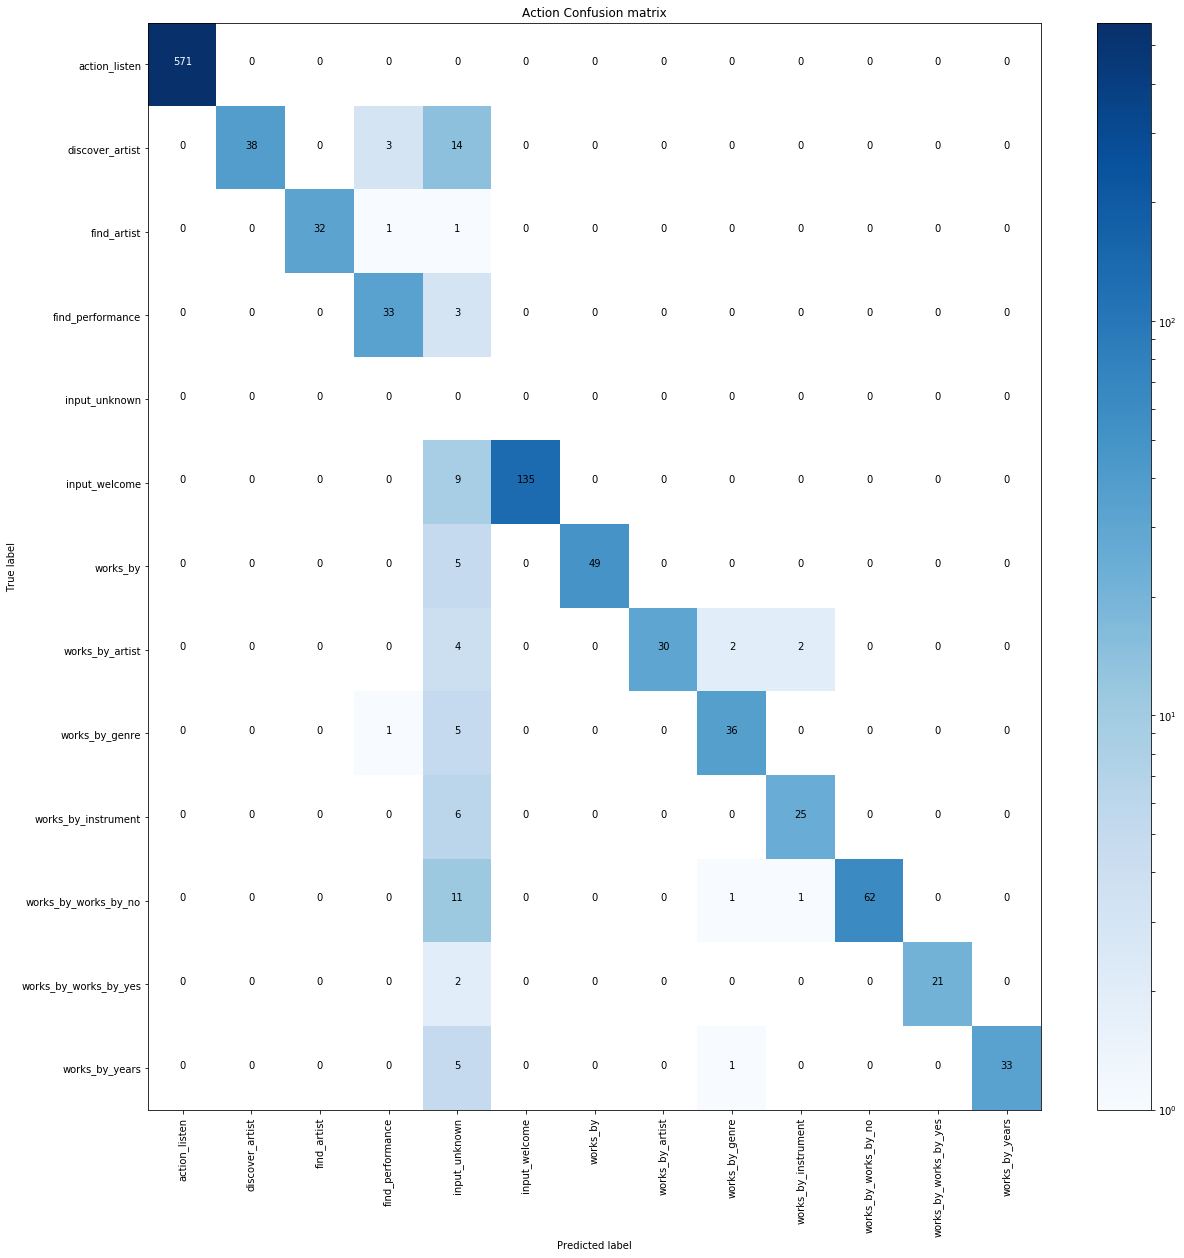

In [21]:
from rasa_core.evaluate import run_story_evaluation
import logging
import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')


run_story_evaluation("stories_evaluation.md", "C:/Users/Alaa Boukhary/Desktop/RASA_project/DOREMOS/models/dialogue", 
                     nlu_model_path=None, 
                     max_stories=None, 
                     out_file_plot="story_evaluation.pdf")